## Bike Sharing Program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
data = pd.read_csv('../../Dataset/Bike Sharing/train.csv')

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
data['datetime'] = pd.to_datetime(data.datetime,errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


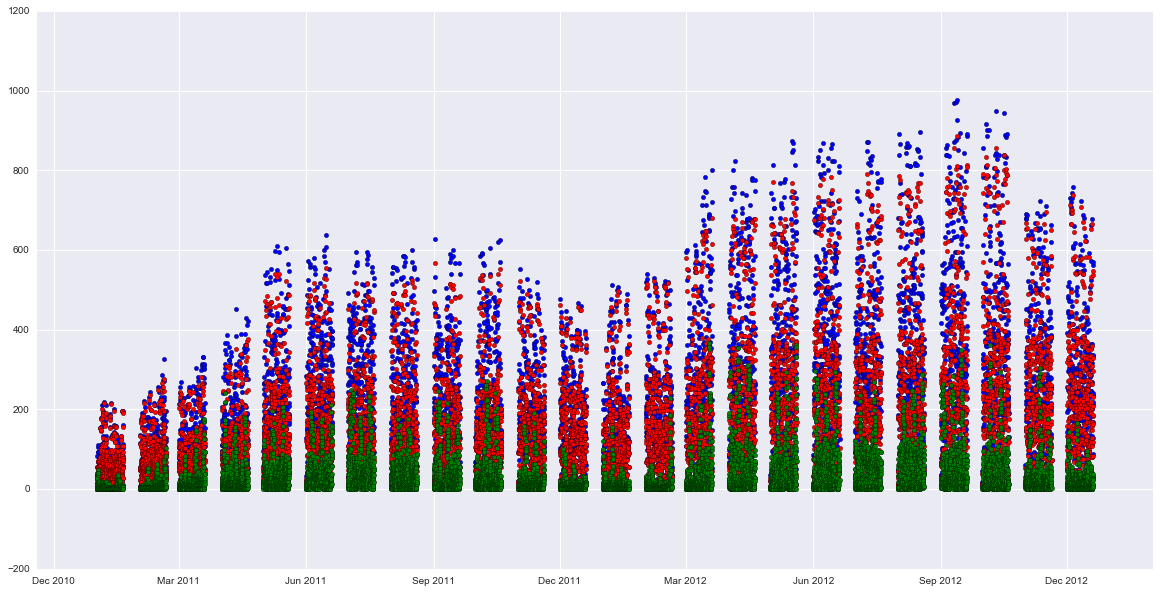

In [8]:
plt.scatter(data['datetime'].values,data['count'].values,c='b')
plt.scatter(data['datetime'].values,data['registered'].values,c='r')
plt.scatter(data['datetime'].values,data['casual'].values,c='g')

Bike sharing seems to be low during extreme winters especially during the month of December and increases smoothly as the year progresses and peaks during the month of September. The above distribution is Bimodal in nature.

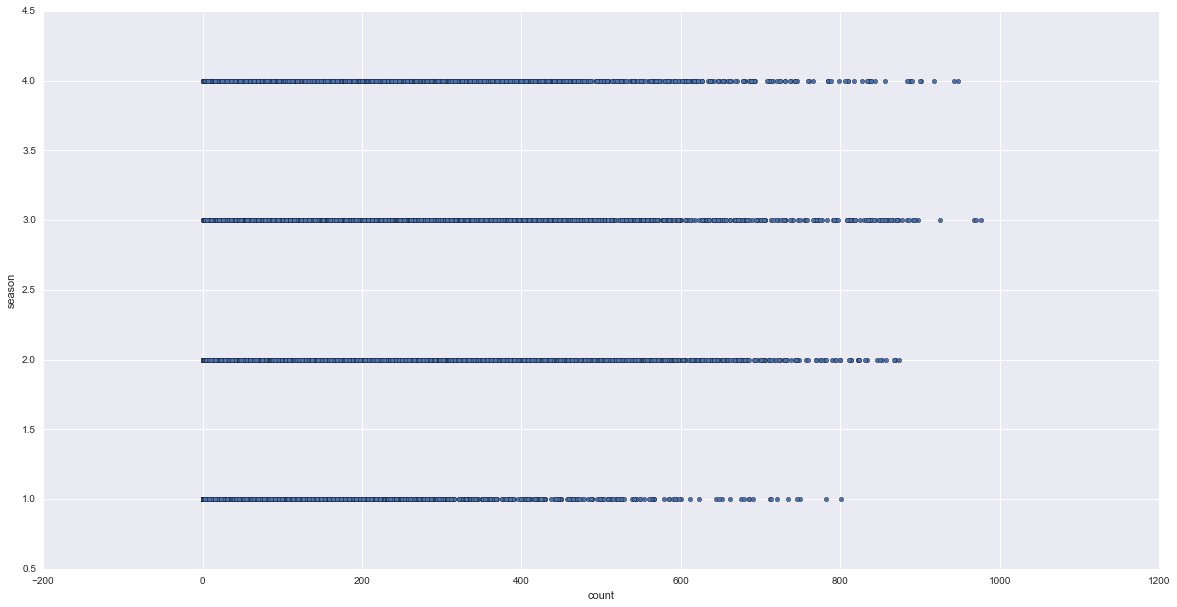

In [9]:
data.plot(kind='scatter',x='count',y='season')

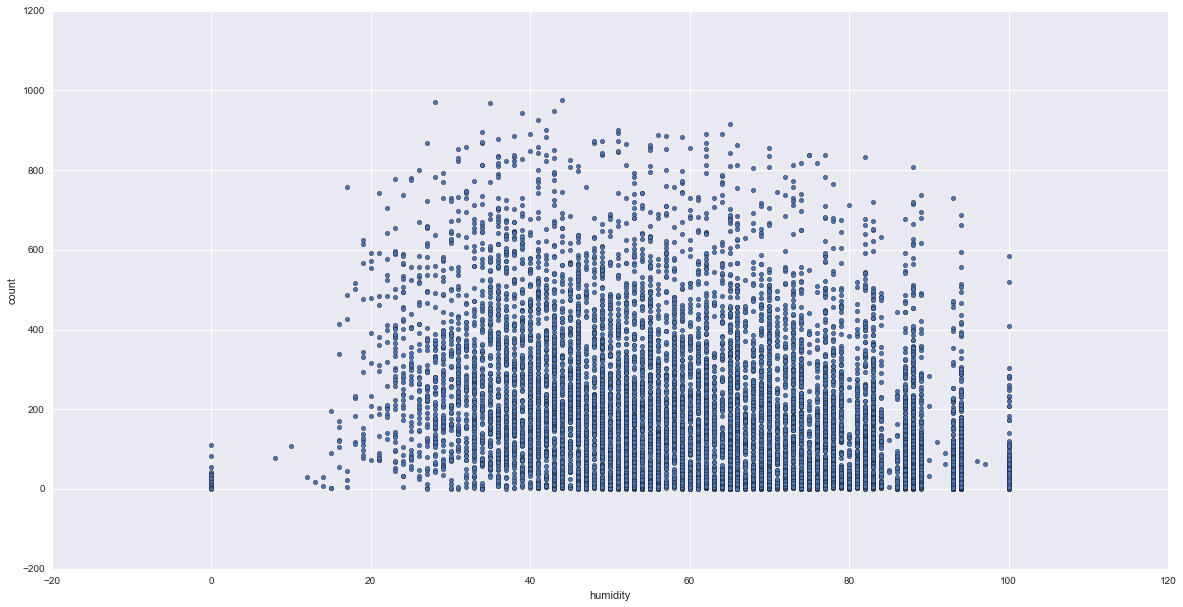

In [10]:
data.plot(kind='scatter',x='humidity',y='count')

Humidity also plays an important role when it comes to bike sharing. People seem to be interested in sharing a bike more when the humidity is in the 20-60 scale.

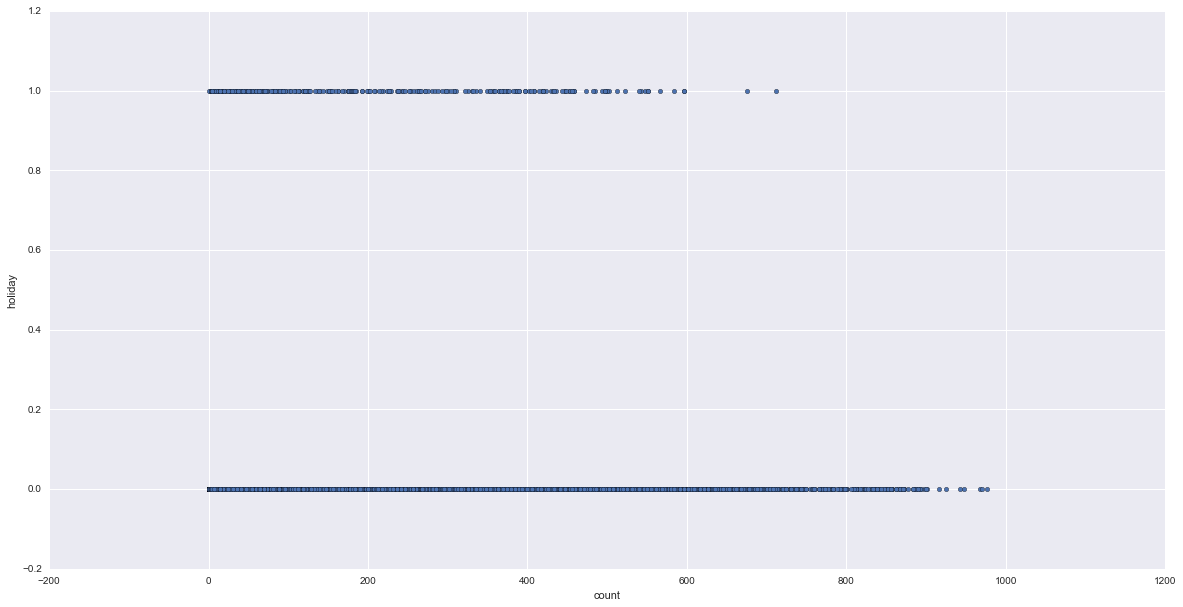

In [11]:
data.plot(kind='scatter',x='count',y='holiday')

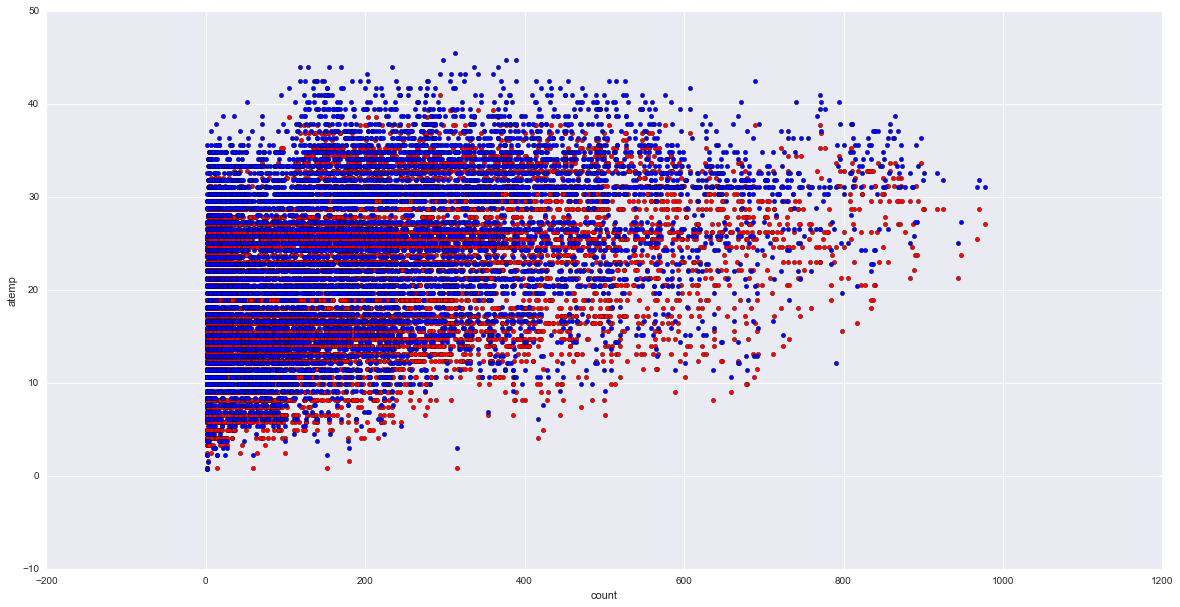

In [12]:
ax = data.plot(kind='scatter',y='temp',x='count',c='r')
data.plot(kind='scatter',y='atemp',x='count',c='b',ax=ax)

The plot of atemp vs count and temp vs count is quite similar. This implies that these features may produce same effect on the count of the data although teh atemp appears to be shifted upwards.

## Dimensionality Reduction Using PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=3)

In [15]:
data['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [16]:
data['day'] = pd.DatetimeIndex(data.datetime).day
data['year'] = pd.DatetimeIndex(data.datetime).year
data['month'] = pd.DatetimeIndex(data.datetime).month
data['hour'] = pd.DatetimeIndex(data.datetime).hour
data['dayofweeek'] = pd.DatetimeIndex(data.datetime).dayofweek
data['weekofyear'] = pd.DatetimeIndex(data.datetime).weekofyear

In [17]:
y = data.pop('count')

In [18]:
data.drop(labels=['datetime','casual','registered'],axis=1,inplace=True)

In [19]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,0,1,9.84,14.395,81,0.0,1,2011,1,0,5,52
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,1,5,52
2,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,2,5,52
3,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,3,5,52
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,52


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
day           10886 non-null int32
year          10886 non-null int32
month         10886 non-null int32
hour          10886 non-null int32
dayofweeek    10886 non-null int32
weekofyear    10886 non-null int32
dtypes: float64(3), int32(6), int64(5)
memory usage: 935.6 KB


In [21]:
pca.fit(data)

PCA(copy=True, n_components=3, whiten=False)

In [22]:
T = pca.transform(data)

In [23]:
print T.shape

(10886, 3)


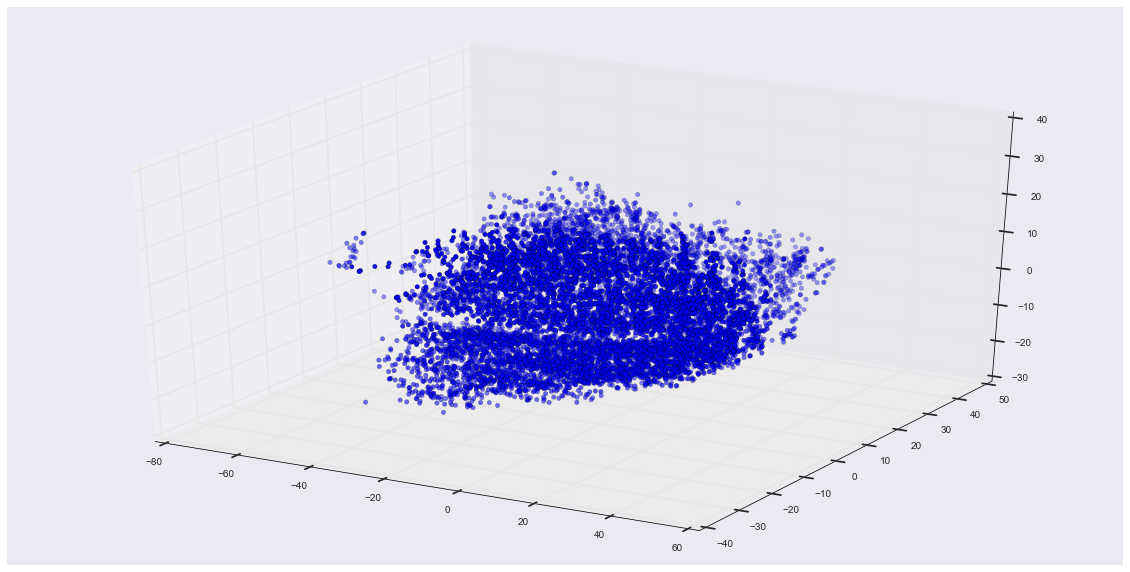

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(T[:,0],T[:,1],T[:,2],c='b')

In [25]:
pca.explained_variance_ratio_.sum()

0.84594975048224097

## Dimensionality Reduction using Isomap

In [26]:
from sklearn.manifold import Isomap

In [27]:
iso = Isomap(n_components=3)

In [28]:
iso.fit(data)

Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_neighbors=5,
    neighbors_algorithm='auto', path_method='auto', tol=0)

In [29]:
T = iso.transform(data)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


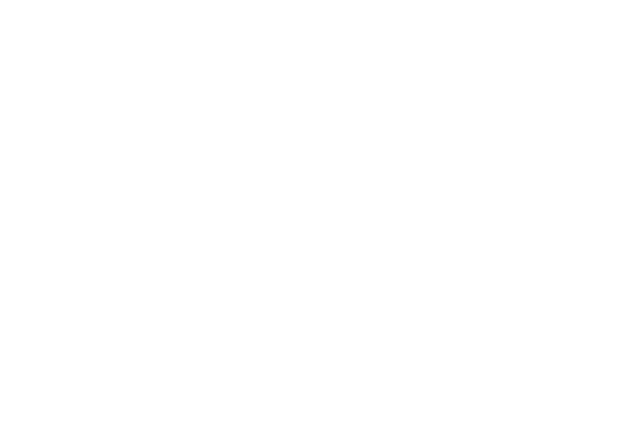

In [30]:
%pylab notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(T[:1000,0],T[:1000,1],T[:1000,2],c='r')

## Benchmark Model

In [31]:
def rmsle(estimator,X,y):
    return (((np.log(1+estimator.predict(X))-np.log(1+y))**2).mean())**(0.5)

In [32]:
print T.shape

(10886, 3)


In [33]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(T,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(7620, 3) (7620,)


In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50)

In [35]:
rfr.fit(X_train,y_train)
print 'Training RMSLE: {}'.format(rmsle(rfr,X_train,y_train))
print 'Test RMSLE: {}'.format(rmsle(rfr,X_test,y_test))

Training RMSLE: 0.754519617285
Test RMSLE: 1.21164218898


Upon reducing the dataset with the help of Isomap, we come to the point where we observe the accuracy to be very low. This implies that the dimensionality reduction is not apt for training the data on the above said regression model

## Benchmark Model without Dimensionality Reduction
### Random Forests

In [36]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,0,1,9.84,14.395,81,0.0,1,2011,1,0,5,52
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,1,5,52
2,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,2,5,52
3,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,3,5,52
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,52


In [37]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [38]:
rfr = RandomForestRegressor(n_estimators=50)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(7620, 14) (7620,)


In [40]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [41]:
score = rmsle(rfr,X_test,y_test)

In [42]:
print 'Testing RMSLE: {}'.format(round(score,6))

Testing RMSLE: 0.33488


In [43]:
feature_importance = {rfr.feature_importances_[i]:data.columns[i] for i in range(len(data.columns))}

In [44]:
importance = pd.Series(feature_importance.keys(),index=feature_importance.values())
importance.sort_values(ascending=False)

hour          0.598208
year          0.086935
temp          0.084852
workingday    0.051835
dayofweeek    0.040474
humidity      0.029899
month         0.025264
atemp         0.022329
weekofyear    0.022190
weather       0.013471
day           0.009239
windspeed     0.007478
season        0.005752
holiday       0.002074
dtype: float64

In [45]:
importance.plot(kind='bar')

Random Forest Regressor with n_estimators = 50 can be considered as a benchmmark model with an error of 0.334482

## Standardising the dataset

In [46]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,9.992559,2011.501929,6.521495,11.541613,3.013963,25.917784
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,5.476608,0.500019,3.444373,6.915838,2.004585,15.017269
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,5.000000,2011.000000,4.000000,6.000000,1.000000,14.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,10.000000,2012.000000,7.000000,12.000000,3.000000,26.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,15.000000,2012.000000,10.000000,18.000000,5.000000,40.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,19.000000,2012.000000,12.000000,23.000000,6.000000,52.000000


In [47]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(data)
X_norm = model.transform(data)
print 'Mean of X_norm : {}'.format(round(mean(X_norm),3))
print 'Standard Deviation of X_norm: {}'.format(np.std(X_norm))

Mean of X_norm : 0.0
Standard Deviation of X_norm: 1.0


In [48]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=81.00)

RBF catches the non linearity of the data

In [49]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
svr.fit(X_train,y_train)
print 'Non-Standardized Data'
print 'Training Error: {}'.format(rmsle(svr,X_train,y_train))
print 'Testing Error: {}'.format(rmsle(svr,X_test,y_test))

Non-Standardized Data
Training Error: 0.653482343654
Testing Error: 1.15621143364


In [50]:
svr = SVR(kernel='rbf',C=81.00)
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.3,random_state=7)
svr.fit(X_train,y_train)
print 'Standardized Data'
print 'Training Error: {}'.format(rmsle(svr,X_train,y_train))
print 'Testing Error: {}'.format(rmsle(svr,X_test,y_test))

Standardized Data
Training Error: 0.875495728514
Testing Error: 0.909273094803


In [51]:
for c in np.arange(10,100,10):
    svr = SVR(kernel='rbf',C=c)
    svr.fit(X_train,y_train)
    print 'C: {}'.format(c)
    print 'Training Error: {}'.format(rmsle(svr,X_train,y_train))
    print 'Testing Error: {}'.format(rmsle(svr,X_test,y_test))

C: 10
Training Error: 0.962382625736
Testing Error: 0.957101807024
C: 20
Training Error: 0.927694129566
Testing Error: 0.959663079292
C: 30
Training Error: 0.927013867437
Testing Error: 0.964657208996
C: 40
Training Error: 0.928484910044
Testing Error: 0.923796240826
C: 50
Training Error: 0.899962735326
Testing Error: 0.923555449976
C: 60
Training Error: 0.892086433632
Testing Error: 0.912821619899
C: 70
Training Error: 0.881188262117
Testing Error: 0.905823947577
C: 80
Training Error: 0.878617432945
Testing Error: 0.90700824391
C: 90
Training Error: 0.875068427778
Testing Error: 0.908125827272


The model doesnt do well with the Support Vector Regressor even when it is Standardised. We can check by Normalising the model.

## Normalising the Data

In [52]:
from sklearn.preprocessing import normalize
X_norm = normalize(data)
print 'Normalized data'
print 'Mean: {}'.format(mean(X_norm))
print 'Standard Deviation: {}'.format(np.std(X_norm))

Normalized data
Mean: 0.0777614561902
Standard Deviation: 0.255698508716


In [53]:
svr = SVR(kernel='rbf',C=81.00)
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.3,random_state=7)
svr.fit(X_train,y_train)
print 'Normalized Data'
print 'Training Error: {}'.format(rmsle(svr,X_train,y_train))
print 'Testing Error: {}'.format(rmsle(svr,X_test,y_test))

Normalized Data
Training Error: 1.46967192619
Testing Error: 1.44190499938


In [54]:
for c in np.arange(10,100,10):
    svr = SVR(kernel='rbf',C=c)
    svr.fit(X_train,y_train)
    print 'C: {}'.format(c)
    print 'Training Error: {}'.format(rmsle(svr,X_train,y_train))
    print 'Testing Error: {}'.format(rmsle(svr,X_test,y_test))

C: 10
Training Error: 1.47985349963
Testing Error: 1.45169743404
C: 20
Training Error: 1.47848608891
Testing Error: 1.45038199603
C: 30
Training Error: 1.47709434376
Testing Error: 1.44904325932
C: 40
Training Error: 1.47579807978
Testing Error: 1.44779798916
C: 50
Training Error: 1.47417717693
Testing Error: 1.44623688
C: 60
Training Error: 1.47308945685
Testing Error: 1.44519517203
C: 70
Training Error: 1.47166487684
Testing Error: 1.44382567248
C: 80
Training Error: 1.46981928714
Testing Error: 1.4420466244
C: 90
Training Error: 1.46862062507
Testing Error: 1.44089844759


Normalising the data further decreases the performance of the model. This implies that the SVC is not able to handle the non linearity of the data as good as the Random Forests Regressor. Thus we go with the random forests.

## Applying Grid Search on the Random Forest Model
Grid Search helps in finding the optimal paramters for the model

In [55]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,0,1,9.84,14.395,81,0.0,1,2011,1,0,5,52
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,1,5,52
2,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,2,5,52
3,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,3,5,52
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,52


In [56]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [57]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(7620, 14) (7620,)


In [58]:
model = RandomForestRegressor(n_estimators=50)
parameters = {'max_features':range(1,10,2),"max_depth":range(5,9,1),\
             "min_samples_leaf":range(1,5,1)}

In [59]:
from sklearn.grid_search import GridSearchCV

In [60]:
classifier = GridSearchCV(model,parameters)

In [61]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 3, 5, 7, 9], 'max_depth': [5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [63]:
rmsle(model,X_test,y_test)

0.32957613540818553

Since grid search also doesn't produce satisfactory results, thus parameter tuning won't be of any help as the model has been saturated. The only thing remains is to do clever feature engineering!!

## Finding patterns in the data corressponding to "working day"

In [64]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,0,1,9.84,14.395,81,0.0,1,2011,1,0,5,52
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,1,5,52
2,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,2,5,52
3,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,3,5,52
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,52


In [65]:
data['workingday'].unique()

array([0, 1])

In [66]:
working = data[data['workingday'] == 1].copy()
not_working = data[data['workingday'] == 0].copy()
working.drop(labels='workingday',inplace=True,axis=1)
not_working.drop(labels='workingday',inplace=True,axis=1)

In [67]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)

In [68]:
iso.fit(working)
working_red = iso.transform(working)

In [69]:
iso = Isomap(n_components=2)
iso.fit(not_working)
not_working_red = iso.transform(not_working)

Populating the interactive namespace from numpy and matplotlib


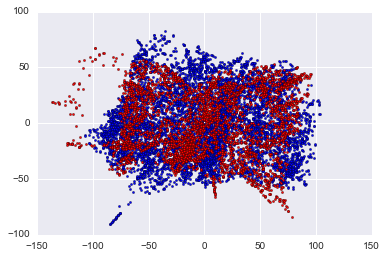

In [82]:
%pylab inline
plt.scatter(working_red[:,0],working_red[:,1],c='b',marker='.',label='working')
plt.scatter(not_working_red[:,0],not_working_red[:,1],c='r',marker='.',label='not working')

There seems to be no distinction on the reduced data corresponding to the fact if its a working day or not.

## Dropping the "atemp" column and "holiday" column
"atemp" column is same as "temp" column. This may be a reason for creating the noise in the dataset.Same is with "holiday".Let's see if dropping it makes any sense! =)

In [83]:
data_copy = data.copy()
data_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,0,1,9.84,14.395,81,0.0,1,2011,1,0,5,52
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,1,5,52
2,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,2,5,52
3,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,3,5,52
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,52


In [84]:
data_copy.drop(labels=['atemp','holiday'],axis=1,inplace=True)
data_copy.head()

,season,workingday,weather,temp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,1,9.84,81,0.0,1,2011,1,0,5,52
1,1,0,1,9.02,80,0.0,1,2011,1,1,5,52
2,1,0,1,9.02,80,0.0,1,2011,1,2,5,52
3,1,0,1,9.84,75,0.0,1,2011,1,3,5,52
4,1,0,1,9.84,75,0.0,1,2011,1,4,5,52


In [85]:
rfr = RandomForestRegressor(n_estimators=50)

In [86]:
X_train,X_test,y_train,y_test = train_test_split(data_copy,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(7620, 12) (7620,)


In [87]:
rfr.fit(X_train,y_train)
score = rmsle(rfr,X_test,y_test)
print 'Testing RMSLE: {}'.format(round(score,3))

Testing RMSLE: 0.335


Since its virtually impossible to drop permutations of column and check for the score with the random forest regressor. We can try to loop through by increasing the n_components for pca and checking for the accuracy.

## Scoring Dimensionality Reduced Components

In [88]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,year,month,hour,dayofweeek,weekofyear
0,1,0,0,1,9.84,14.395,81,0.0,1,2011,1,0,5,52
1,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,1,5,52
2,1,0,0,1,9.02,13.635,80,0.0,1,2011,1,2,5,52
3,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,3,5,52
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,52


In [89]:
print 'Number of features: {}'.format(len(data.columns))

Number of features: 14


In [90]:
rfr = RandomForestRegressor(n_estimators=50)

### PCA

In [80]:
error,components = [],[]
for i in range(3,15):
    components.append(i)
    print 'Number of Components: {}'.format(i)
    pca = PCA(n_components=i)
    pca.fit(data)
    X = pca.transform(data)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)
    rfr.fit(X_train,y_train)
    score = rmsle(rfr,X_test,y_test)
    print 'RMSLE On Testing Set: {}'.format(round(rmsle(rfr,X_test,y_test),3))
    error.append(score)

Number of Components: 3
RMSLE On Testing Set: 1.182
Number of Components: 4
RMSLE On Testing Set: 1.179
Number of Components: 5
RMSLE On Testing Set: 0.85
Number of Components: 6
RMSLE On Testing Set: 0.852
Number of Components: 7
RMSLE On Testing Set: 0.783
Number of Components: 8
RMSLE On Testing Set: 0.791
Number of Components: 9
RMSLE On Testing Set: 0.804
Number of Components: 10
RMSLE On Testing Set: 0.803
Number of Components: 11
RMSLE On Testing Set: 0.788
Number of Components: 12
RMSLE On Testing Set: 0.785
Number of Components: 13
RMSLE On Testing Set: 0.785
Number of Components: 14
RMSLE On Testing Set: 0.788


In [81]:
plt.plot(components,error)
plt.title('Error vs Number of Components')
plt.xlabel('n_components')
plt.ylabel('RMSLE')

I am such a fool... How can I forget that PCA wont be able to capture the non linearity of the data. This implies that dropping columns and applying PCA can be very different in non-linear data. GOTCHA!!!

## Test Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

In [ ]:
test = pd.read_csv('../../Dataset/Bike Sharing/test.csv')
test.head()

In [ ]:
test['day'] = pd.DatetimeIndex(test.datetime).day
test['year'] = pd.DatetimeIndex(test.datetime).year
test['month'] = pd.DatetimeIndex(test.datetime).month
test['hour'] = pd.DatetimeIndex(test.datetime).hour
test['dayofweeek'] = pd.DatetimeIndex(test.datetime).dayofweek
test['weekofyear'] = pd.DatetimeIndex(test.datetime).weekofyear
test.head()

In [ ]:
datetime = test.pop('datetime')
test.head()

In [ ]:
model = RandomForestRegressor(n_estimators=50)
parameters = {'max_features':range(1,10,2),"max_depth":range(5,9,1),\
             "min_samples_leaf":range(1,5,1)}

In [ ]:
from sklearn.grid_search import GridSearchCV
classifier = GridSearchCV(model,parameters)

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
classifier.get_params

In [ ]:
model.fit(X_train,y_train)
print 'RMSLE Error: {}'.format(rmsle(model,X_test,y_test))

In [ ]:
yPred = np.asarray([round(i,3) for i in model.predict(test)])
print yPred.shape

In [ ]:
print yPred

In [ ]:
import csv as csv
fp = open('submission.csv','wb')
p = csv.writer(fp)
p.writerow(['datetime','count'])

In [ ]:
for i in range(len(yPred)):
    p.writerow([datetime[i],yPred[i]])